In [2]:
%pip install folium
%pip install Dash
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from dash import Dash, dcc, html, Input, Output
import plotly.express as px


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

# Spécifier le chemin correct du fichier
file_path = "C:/Users/SANKARA/Desktop/formation_Force_N/MODIS_C6_1_Australia_NewZealand_MCD14DL_NRT_2025048.txt"

# Lire le fichier TXT comme un CSV (séparé par des virgules)
df = pd.read_csv(file_path, sep=",", encoding="utf-8")

# Afficher un aperçu des premières lignes
print(df.head())


   latitude  longitude  brightness  scan  track    acq_date acq_time  \
0 -18.84401  133.64821      346.36  1.83   1.33  2025-02-17    00:47   
1 -19.72754  135.96602      324.69  2.83   1.61  2025-02-17    00:47   
2 -19.71634  135.96046      320.83  2.83   1.61  2025-02-17    00:47   
3 -19.73064  135.95895      323.34  2.83   1.61  2025-02-17    00:47   
4 -18.84697  133.63651      347.92  1.83   1.32  2025-02-17    00:47   

  satellite  confidence version  bright_t31     frp daynight  
0         T          92  6.1NRT      304.24   99.38        D  
1         T          69  6.1NRT      301.70   55.91        D  
2         T          57  6.1NRT      303.27   36.09        D  
3         T          66  6.1NRT      301.22   48.53        D  
4         T          93  6.1NRT      302.65  106.77        D  


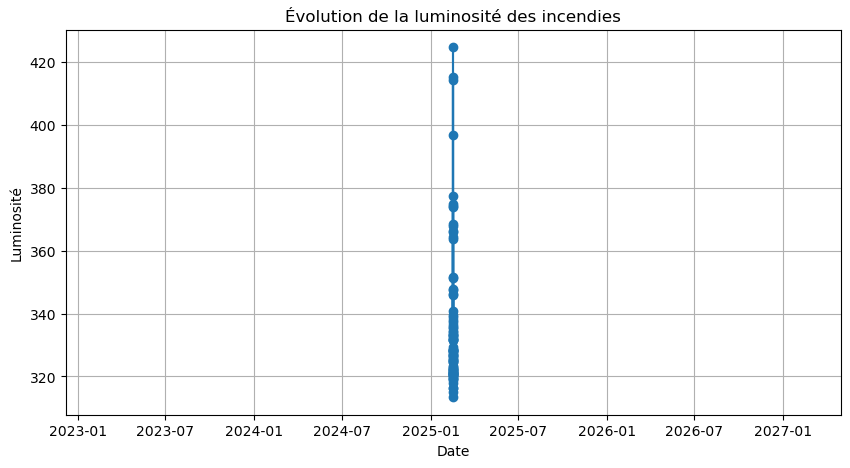

In [5]:
# --------------- PARTIE 1 : Visualisations avec Matplotlib, Seaborn et Folium ---------------

# Tâche 1.1 : Graphique en ligne des ventes d'automobiles
df['acq_date'] = pd.to_datetime(df['acq_date'])
plt.figure(figsize=(10, 5))
plt.plot(df['acq_date'], df['brightness'], marker='o', linestyle='-')
plt.title("Évolution de la luminosité des incendies")
plt.xlabel("Date")
plt.ylabel("Luminosité")
plt.grid()
plt.show()

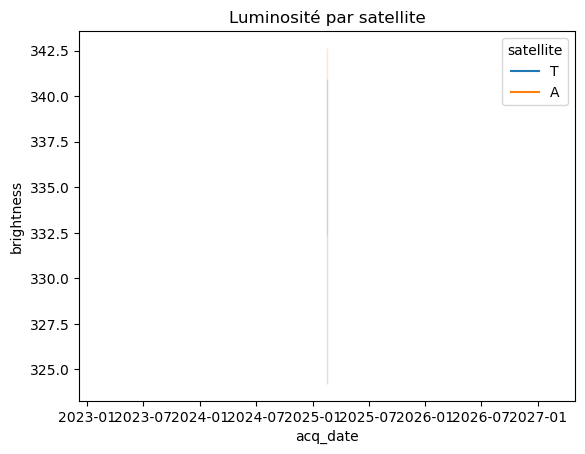

In [6]:
# Tâche 1.2 : Tracer différentes lignes pour types de véhicules (remplacé ici par satellites)
sns.lineplot(data=df, x='acq_date', y='brightness', hue='satellite')
plt.title("Luminosité par satellite")
plt.show()


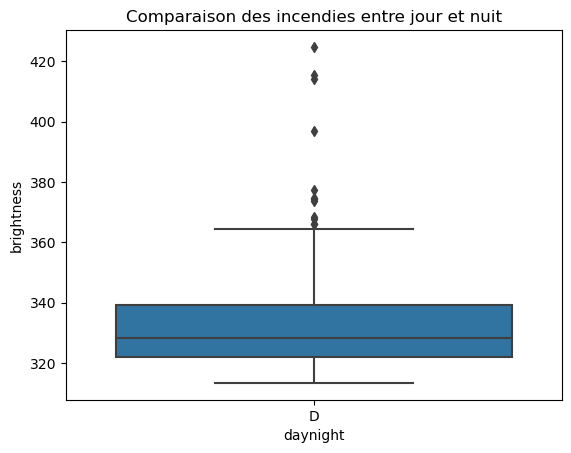

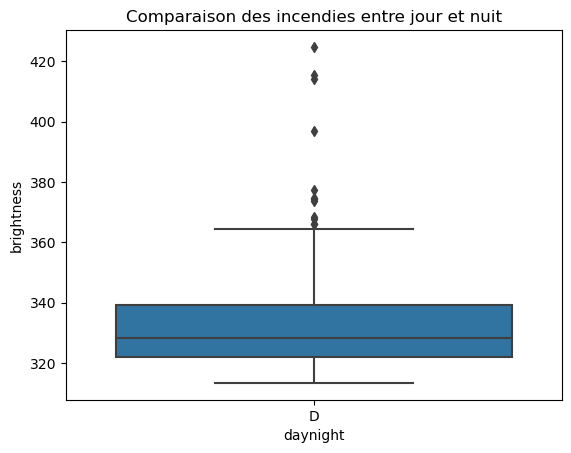

In [7]:
# Tâche 1.3 : Comparaison période de récession (remplacé par jour/nuit)
sns.boxplot(data=df, x='daynight', y='brightness')
plt.title("Comparaison des incendies entre jour et nuit")
plt.show()# Tâche 1.3 : Comparaison période de récession (remplacé par jour/nuit)
sns.boxplot(data=df, x='daynight', y='brightness')
plt.title("Comparaison des incendies entre jour et nuit")
plt.show()

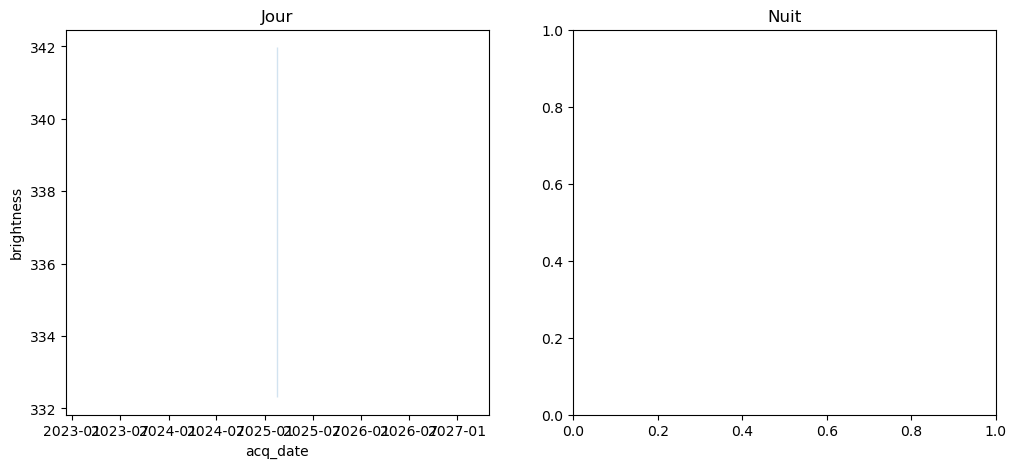

In [8]:
# Tâche 1.4 : Comparaison variations du PIB (remplacé ici par la luminosité par période)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.lineplot(data=df[df['daynight'] == 'D'], x='acq_date', y='brightness', ax=axes[0])
axes[0].set_title("Jour")
sns.lineplot(data=df[df['daynight'] == 'N'], x='acq_date', y='brightness', ax=axes[1])
axes[1].set_title("Nuit")
plt.show()

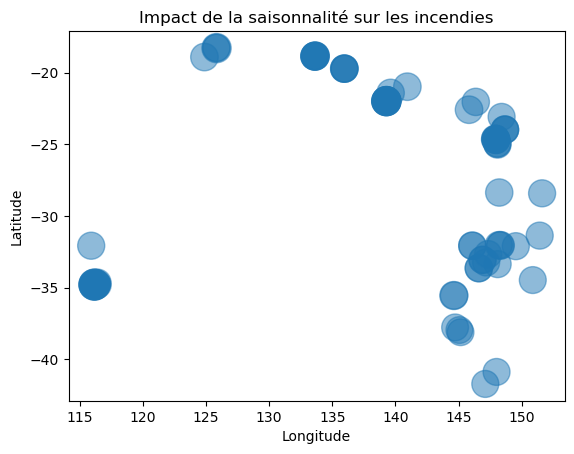

In [9]:
# Tâche 1.5 : Diagramme à bulles
df['size'] = df['brightness'] / df['brightness'].max() * 500
plt.scatter(df['longitude'], df['latitude'], s=df['size'], alpha=0.5)
plt.title("Impact de la saisonnalité sur les incendies")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

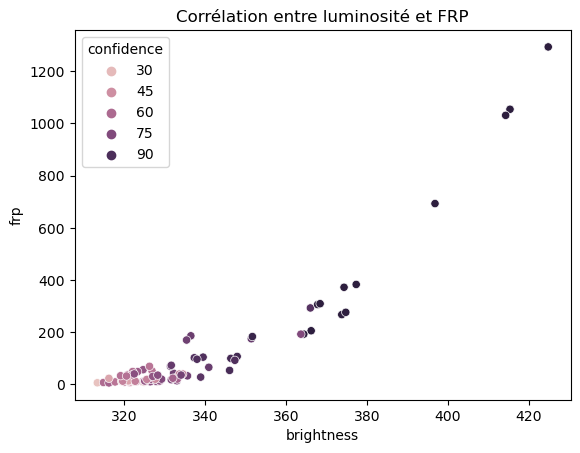

In [10]:
# Tâche 1.6 : Diagramme de dispersion
sns.scatterplot(data=df, x='brightness', y='frp', hue='confidence')
plt.title("Corrélation entre luminosité et FRP")
plt.show()

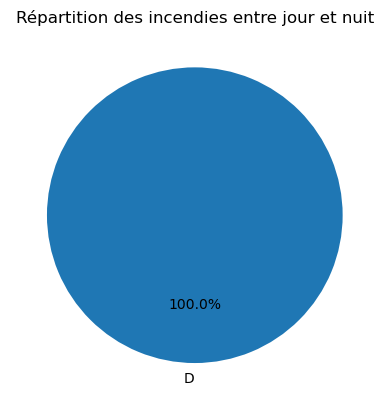

In [11]:
# Tâche 1.7 & 1.8 : Diagrammes circulaires
labels = df['daynight'].value_counts().index
sizes = df['daynight'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Répartition des incendies entre jour et nuit")
plt.show()

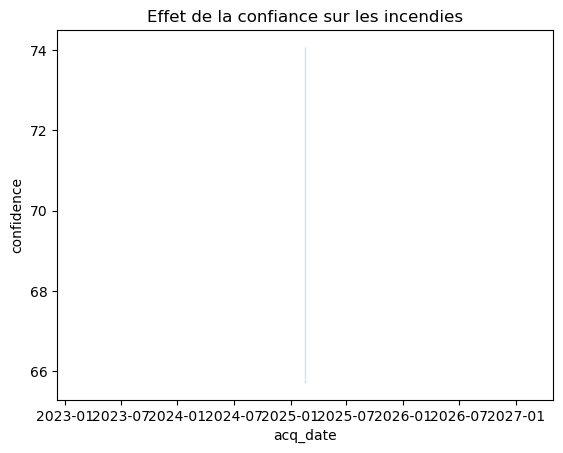

In [12]:
# Tâche 1.9 : Graphique linéaire de l'effet du chômage (remplacé ici par confiance)
sns.lineplot(data=df, x='acq_date', y='confidence')
plt.title("Effet de la confiance sur les incendies")
plt.show()

# Carte interactive avec Folium
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=5)
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='red' if row['daynight'] == 'D' else 'blue',
        fill=True,
        fill_color='red' if row['daynight'] == 'D' else 'blue'
    ).add_to(m)
m.save("map.html")

In [19]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Charger les données fictives
recession_data = pd.DataFrame({
    'Année': [2018, 2019, 2020, 2021, 2022],
    'Croissance PIB (%)': [2.5, 2.8, -3.5, 4.0, 3.2],
    'Chômage (%)': [5.1, 4.9, 7.8, 6.3, 5.7]
})

annual_report_data = pd.DataFrame({
    'Année': [2018, 2019, 2020, 2021, 2022],
    'Revenu Moyen ($)': [40000, 42000, 39000, 45000, 47000],
    'Dépenses Moyennes ($)': [35000, 37000, 34000, 39000, 41000]
})

# Initialiser l'application Dash
app = dash.Dash(__name__)
app.title = "Tableau de Bord des Statistiques Économiques"

# Mise en page de l'application
app.layout = html.Div([
    html.H1("Tableau de Bord des Statistiques Économiques", 
            style={'textAlign': 'center', 'color': '#2C3E50', 'font-size': 26}),

    html.Label("Sélectionnez un type de rapport :", style={'font-weight': 'bold'}),
    dcc.Dropdown(
        id='report-type',
        options=[
            {'label': 'Rapport sur la récession', 'value': 'recession'},
            {'label': 'Rapport annuel', 'value': 'annual'}
        ],
        value='recession',
        style={'width': '50%', 'margin-bottom': '20px'}
    ),

    html.Div(id='output-container', className='output-div'),
])

# Définition de la fonction de rappel pour mettre à jour le graphique
@app.callback(
    Output('output-container', 'children'),
    [Input('report-type', 'value')]
)
def update_output(report_type):
    """ Met à jour le graphique en fonction du type de rapport sélectionné. """
    if report_type == 'recession':
        fig = px.line(recession_data, x='Année', y=['Croissance PIB (%)', 'Chômage (%)'],
                      title='Statistiques de Récession', markers=True)
    else:
        fig = px.bar(annual_report_data, x='Année', y=['Revenu Moyen ($)', 'Dépenses Moyennes ($)'],
                     title='Statistiques du Rapport Annuel', barmode='group')

    return dcc.Graph(figure=fig)

# Exécuter l'application sur un autre port pour éviter les conflits
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)


In [14]:



import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd

# Charger les données depuis un fichier CSV ou une variable
fire_data = pd.read_csv("fire_data.csv")  # Remplacez par votre fichier réel si besoin
fire_data['acq_date'] = pd.to_datetime(fire_data['acq_date'])

# Initialiser l'application Dash
app = dash.Dash(__name__)
app.title = "Carte des Incendies"

# Mise en page de l'application
app.layout = html.Div([
    html.H1("Carte Interactive des Incendies", style={'textAlign': 'center'}),
    
    html.Label("Sélectionnez une date :"),
    dcc.Dropdown(
        id='date-selector',
        options=[{'label': str(date.date()), 'value': str(date.date())} for date in fire_data['acq_date'].unique()],
        value=str(fire_data['acq_date'].min().date())
    ),
    
    html.Div(id='map-container', className='map-div'),
    
    dcc.Graph(id='scatter-plot'),
])

# Définition de la fonction de rappel
@app.callback(
    [Output('map-container', 'children'), Output('scatter-plot', 'figure')],
    [Input('date-selector', 'value')]
)
def update_output(selected_date):
    df_filtered = fire_data[fire_data['acq_date'] == selected_date]
    
    # Création de la carte Folium
    m = folium.Map(location=[df_filtered['latitude'].mean(), df_filtered['longitude'].mean()], zoom_start=5)
    for _, row in df_filtered.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            color='red' if row['confidence'] > 75 else 'orange',
            fill=True,
            fill_color='red' if row['confidence'] > 75 else 'orange'
        ).add_to(m)
    
    map_path = "map.html"
    m.save(map_path)
    
    # Création du graphique interactif
    fig = px.scatter(df_filtered, x='bright_t31', y='frp',
                     title='Température de Brillance vs Puissance de Feu',
                     labels={'bright_t31': 'Température de Brillance (K)', 'frp': 'Puissance de Feu'})
    
    return html.Iframe(srcDoc=open(map_path, 'r').read(), width='100%', height='500px'), fig

# Exécuter l'application
if __name__ == '__main__':
    app.run_server(debug=True)


FileNotFoundError: [Errno 2] No such file or directory: 'fire_data.csv'

In [21]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import os

# Charger les données fictives
recession_data = pd.DataFrame({
    'Année': [2018, 2019, 2020, 2021, 2022],
    'Croissance PIB (%)': [2.5, 2.8, -3.5, 4.0, 3.2],
    'Chômage (%)': [5.1, 4.9, 7.8, 6.3, 5.7]
})

annual_report_data = pd.DataFrame({
    'Année': [2018, 2019, 2020, 2021, 2022],
    'Revenu Moyen ($)': [40000, 42000, 39000, 45000, 47000],
    'Dépenses Moyennes ($)': [35000, 37000, 34000, 39000, 41000]
})

# Initialiser l'application Dash
app = dash.Dash(__name__)
app.title = "Tableau de Bord des Statistiques Économiques"

# Mise en page de l'application
app.layout = html.Div([
    html.H1("Tableau de Bord des Statistiques Économiques", 
            style={'textAlign': 'center', 'color': '#2C3E50', 'font-size': 26}),

    html.Label("Sélectionnez un type de rapport :", style={'font-weight': 'bold'}),
    dcc.Dropdown(
        id='report-type',
        options=[
            {'label': 'Rapport sur la récession', 'value': 'recession'},
            {'label': 'Rapport annuel', 'value': 'annual'}
        ],
        value='recession',
        style={'width': '50%', 'margin-bottom': '20px'}
    ),

    html.Div(id='output-container', className='output-div'),
])

# Définition de la fonction de rappel pour mettre à jour le graphique
@app.callback(
    Output('output-container', 'children'),
    [Input('report-type', 'value')]
)
def update_output(report_type):
    """ Met à jour le graphique en fonction du type de rapport sélectionné. """
    if report_type == 'recession':
        fig = px.line(recession_data, x='Année', y=['Croissance PIB (%)', 'Chômage (%)'],
                      title='Statistiques de Récession', markers=True)
    else:
        fig = px.bar(annual_report_data, x='Année', y=['Revenu Moyen ($)', 'Dépenses Moyennes ($)'],
                     title='Statistiques du Rapport Annuel', barmode='group')

    return dcc.Graph(figure=fig)

# Trouver un port libre si 8050 est occupé
def get_available_port(default_port=8050):
    import socket
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        if s.connect_ex(('127.0.0.1', default_port)) != 0:
            return default_port
        else:
            return default_port + 1  # Essayer un autre port

# Exécuter l'application avec un port dynamique
if __name__ == '__main__':
    port = get_available_port()
    print(f"Lancement de l'application sur le port {port}")
    app.run_server(debug=True, port=port)


Lancement de l'application sur le port 8051
